## Objective:
Build a system using the Ames Housing dataset to predict house prices and understand which factors affect the price most. The project also compares different regression models and checks where the predictions do not work well, especially for very expensive or very cheap houses.

## Project overview 
Housing prices depend on many things like location, size of the house, quality, and nearby area. Knowing the correct price is important for buyers, sellers, and real estate agents to make better decisions.

In this project, the goal is not only to predict house prices but also to understand which factors affect the price the most. The project also focuses on finding where the model works well and where it makes mistakes (where predictive models tend to fail ) so the results can be trusted in real-life situations.

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [13]:
dataset = pd.read_csv("AmesHousing.csv")

In [14]:
dataset.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [15]:
dataset['Sale Condition'].unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

In [16]:
dataset[['Lot Area','Sale Condition','SalePrice']].sample(3)

,Lot Area,Sale Condition,SalePrice
1178,14963,Normal,245500
1266,8892,Normal,116000
1793,8640,Partial,208900


## Problem Framing & Key Questions

The aim of this project is to predict house prices using past data and understand which factors affect prices the most. The focus is not only on prediction, but also on learning price patterns.

A successful model should give reasonable predictions on new data and clearly show which features influence the price. It should work well for most houses, not just the training data.

The main risk is wrong price prediction, which can mislead buyers or sellers. Overfitting or underfitting of model can cause financial loss, so model reliability is important.

The model may not perform well for very expensive houses, very old properties, or areas with limited data. These cases are harder to predict because there are fewer similar examples in the dataset.


In [17]:
dataset.shape

(2930, 82)

In [45]:
dataset['Sale Condition'].unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [19]:
dataset['Pool QC'].isnull().sum()

2917

In [20]:
dataset['Pool QC'].unique()

array([nan, 'Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [21]:
dataset.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [51]:
dataset[['Lot Area','Lot Frontage','SalePrice']].corr()

,Lot Area,Lot Frontage,SalePrice
Lot Area,1.000000,0.491313,0.266549
Lot Frontage,0.491313,1.000000,0.357318
SalePrice,0.266549,0.357318,1.000000


#### AS We can see SalePrice is more dependent on Lot Frontage as compare to Lot Area as 12.7% of the variation in SalePrice can be explained by Lot Frontage & 7.1% of the variation in SalePrice can be explained by Lot Area.

In [52]:
dataset[['Overall Qual','Gr Liv Area','SalePrice']].corr()

,Overall Qual,Gr Liv Area,SalePrice
Overall Qual,1.000000,0.570556,0.799262
Gr Liv Area,0.570556,1.000000,0.706780
SalePrice,0.799262,0.706780,1.000000


In [56]:
dataset.select_dtypes(include=['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Overall Qual     2930 non-null   int64  
 6   Overall Cond     2930 non-null   int64  
 7   Year Built       2930 non-null   int64  
 8   Year Remod/Add   2930 non-null   int64  
 9   Mas Vnr Area     2907 non-null   float64
 10  BsmtFin SF 1     2929 non-null   float64
 11  BsmtFin SF 2     2929 non-null   float64
 12  Bsmt Unf SF      2929 non-null   float64
 13  Total Bsmt SF    2929 non-null   float64
 14  1st Flr SF       2930 non-null   int64  
 15  2nd Flr SF       2930 non-null   int64  
 16  Low Qual Fin SF  2930 non-null   int64  
 17  Gr Liv Area   

In [57]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [58]:
dataset[['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice']].corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


## As we see from corr matrix , several features of datatype(int64 , float64) show  strong linear relatioship with the target variable(Sale Price) : 
As all these features not contribute equally so I divide into category according to importance Tier1 , Tier2 , Tier3

## Tier 1: Strong Linear Association (Correlation > 0.70)

OverallQual (overall material and finish quality) , 
GrLivArea (above-ground living area)

## Tier 2: Moderate Linear Association (Correlation ≈ 0.50–0.70)

GarageCars, GarageArea , 
FullBath , 
TotalBsmtSF, 1stFlrSF , 
YearBuilt, YearRemodAdd
MasVnrArea , 
TotRmsAbvGrd 

Many of these features are interrelated, suggesting potential multicollinearity, particularly among size- and garage-related attributes.

## Tier 3: Weak to Moderate Linear Association (Correlation ≈ 0.20–0.50)

LotFrontage, LotArea ,
BsmtFinSF1, 2ndFlrSF ,
BsmtFullBath, HalfBath ,
Fireplaces , 
WoodDeckSF, OpenPorchSF

## Note : 
Correlation analysis reflects only linear relationships and does not imply causation. Some features with lower correlation may still play an important role through non-linear effects or interactions, which will be explored in subsequent analysis.

In [61]:
dataset['Yr Sold'].unique()

array([2010, 2009, 2008, 2007, 2006], dtype=int64)

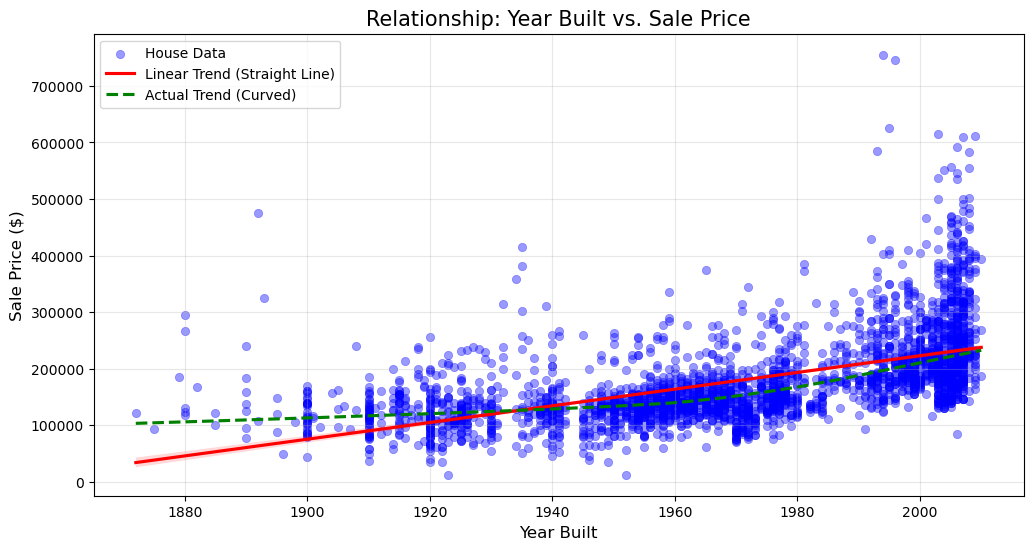

In [62]:
plt.figure(figsize=(12, 6))

# 1. Plot the actual data points (Blue dots)
sns.scatterplot(x='Year Built', y='SalePrice', data=dataset, 
                alpha=0.4, color='blue', edgecolor=None, label='House Data')

# 2. Add the Linear Regression Line (Red)
# This shows what the model "thinks" the relationship is if it assumes a straight line.
sns.regplot(x='Year Built', y='SalePrice', data=dataset, scatter=False, 
            color='red', label='Linear Trend (Straight Line)')

# 3. Add the Non-Linear Trend (Green)
# "lowess=True" allows the line to curve and fit the data flexibly.
sns.regplot(x='Year Built', y='SalePrice', data=dataset, scatter=False, 
            lowess=True, color='green', line_kws={'linestyle':'--'}, label='Actual Trend (Curved)')

# Formatting the chart
plt.title('Relationship: Year Built vs. Sale Price', fontsize=15)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Sale Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

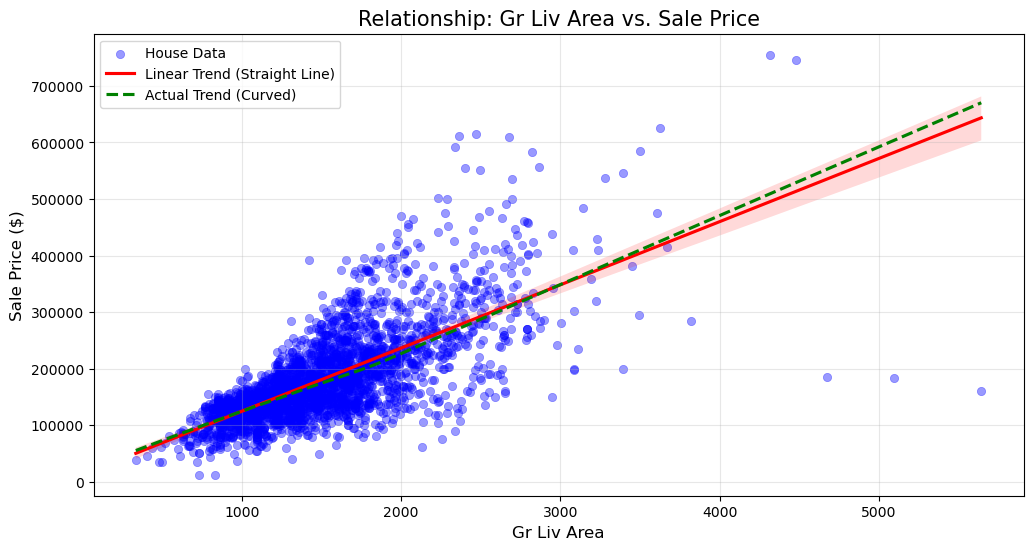

In [64]:
plt.figure(figsize=(12, 6))

# 1. Plot the actual data points (Blue dots)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=dataset, 
                alpha=0.4, color='blue', edgecolor=None, label='House Data')

# 2. Add the Linear Regression Line (Red)
# This shows what the model "thinks" the relationship is if it assumes a straight line.
sns.regplot(x='Gr Liv Area', y='SalePrice', data=dataset, scatter=False, 
            color='red', label='Linear Trend (Straight Line)')

# 3. Add the Non-Linear Trend (Green)
# "lowess=True" allows the line to curve and fit the data flexibly.
sns.regplot(x='Gr Liv Area', y='SalePrice', data=dataset, scatter=False, 
            lowess=True, color='green', line_kws={'linestyle':'--'}, label='Actual Trend (Curved)')

# Formatting the chart
plt.title('Relationship: Gr Liv Area vs. Sale Price', fontsize=15)
plt.xlabel('Gr Liv Area', fontsize=12)
plt.ylabel('Sale Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

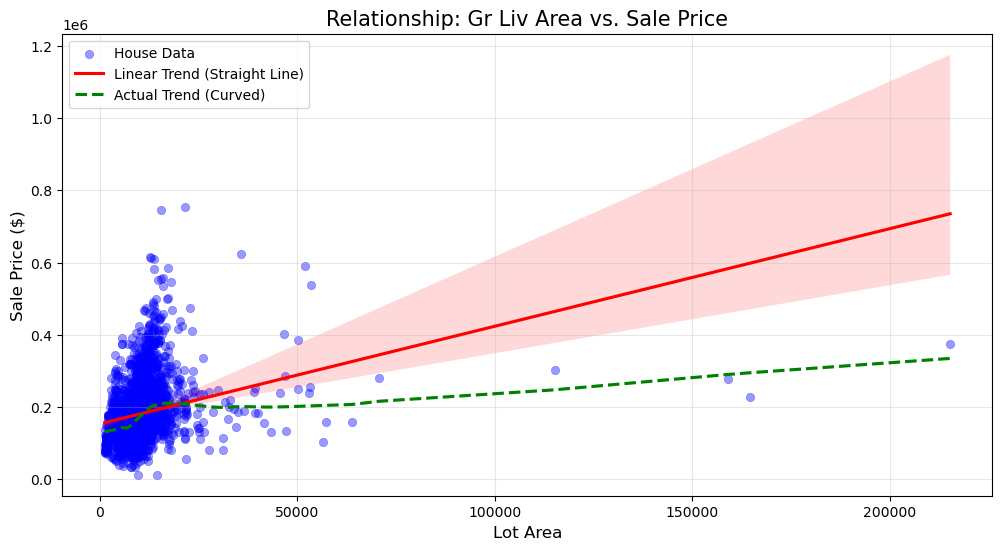

In [66]:
plt.figure(figsize=(12, 6))

# 1. Plot the actual data points (Blue dots)
sns.scatterplot(x='Lot Area', y='SalePrice', data=dataset, 
                alpha=0.4, color='blue', edgecolor=None, label='House Data')

# 2. Add the Linear Regression Line (Red)
# This shows what the model "thinks" the relationship is if it assumes a straight line.
sns.regplot(x='Lot Area', y='SalePrice', data=dataset, scatter=False, 
            color='red', label='Linear Trend (Straight Line)')

# 3. Add the Non-Linear Trend (Green)
# "lowess=True" allows the line to curve and fit the data flexibly.
sns.regplot(x='Lot Area', y='SalePrice', data=dataset, scatter=False, 
            lowess=True, color='green', line_kws={'linestyle':'--'}, label='Actual Trend (Curved)')

# Formatting the chart
plt.title('Relationship: Gr Liv Area vs. Sale Price', fontsize=15)
plt.xlabel('Lot Area', fontsize=12)
plt.ylabel('Sale Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

### Here you can understand fron the visualization what is Linear relationship in correlation